In [50]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import json, sys, random
from sklearn.metrics import accuracy_score

In [51]:
f = open('./ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [6]:
print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [52]:
shipdata = pd.read_json('./ships-in-satellite-imagery/shipsnet.json')
shipdata.tail(10)

,data,labels,locations,scene_ids
3990,"[62, 71, 68, 64, 63, 67, 64, 63, 63, 61, 63, 6...",0,"[-122.34261421096728, 37.68377118462645]",20170730_181044_103d
3991,"[109, 108, 106, 96, 93, 115, 113, 103, 117, 11...",0,"[-122.10947807051694, 37.74424199581469]",20170902_190520_0f53
3992,"[85, 86, 109, 170, 181, 172, 179, 156, 164, 19...",0,"[-122.2517775690549, 37.744122642144035]",20171127_181538_101e
3993,"[102, 88, 85, 90, 92, 85, 91, 94, 89, 92, 92, ...",0,"[-122.49403225538684, 37.84183398930845]",20170717_180817_1010
3994,"[123, 126, 119, 123, 127, 125, 124, 119, 115, ...",0,"[-122.48526939813327, 37.71411574158604]",20171213_181610_100c
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16
3999,"[122, 122, 126, 126, 142, 153, 174, 190, 185, ...",0,"[-122.49531387721586, 37.698557210117706]",20180206_184438_1043


In [98]:
shipdata.head(5)

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [100]:
print(np.array(dataset['data']).astype('uint8')[3990])

[62 71 68 ... 64 63 74]


In [115]:
#Filtering out images and labels from JSON object
x0 = np.array(dataset['data']).astype('uint8')
y0 = np.array(dataset['labels']).astype('uint8')

print(x.shape)

#Reshaping input images in order to feed to CNN
x00 = x0.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
print(x.shape)
print(y0.shape)

(4000, 80, 80, 3)
(4000, 80, 80, 3)
(4000,)


In [114]:
# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

#Shuffling Images and Labels by same shuffled index
x = x00[indexes]
y = y0[indexes]

index_0 = np.where(y == 0)
index_1 = np.where(y == 1)

# ship
x_ship = x[index_1]
y_ship = y[index_1]

# not ship
x_no_ship = x[index_0]
y_no_ship = y[index_0]

0 Ship
1 Ship
2 Ship
3 Ship
4 Ship
5 Ship
6 Ship
7 Ship
8 Ship


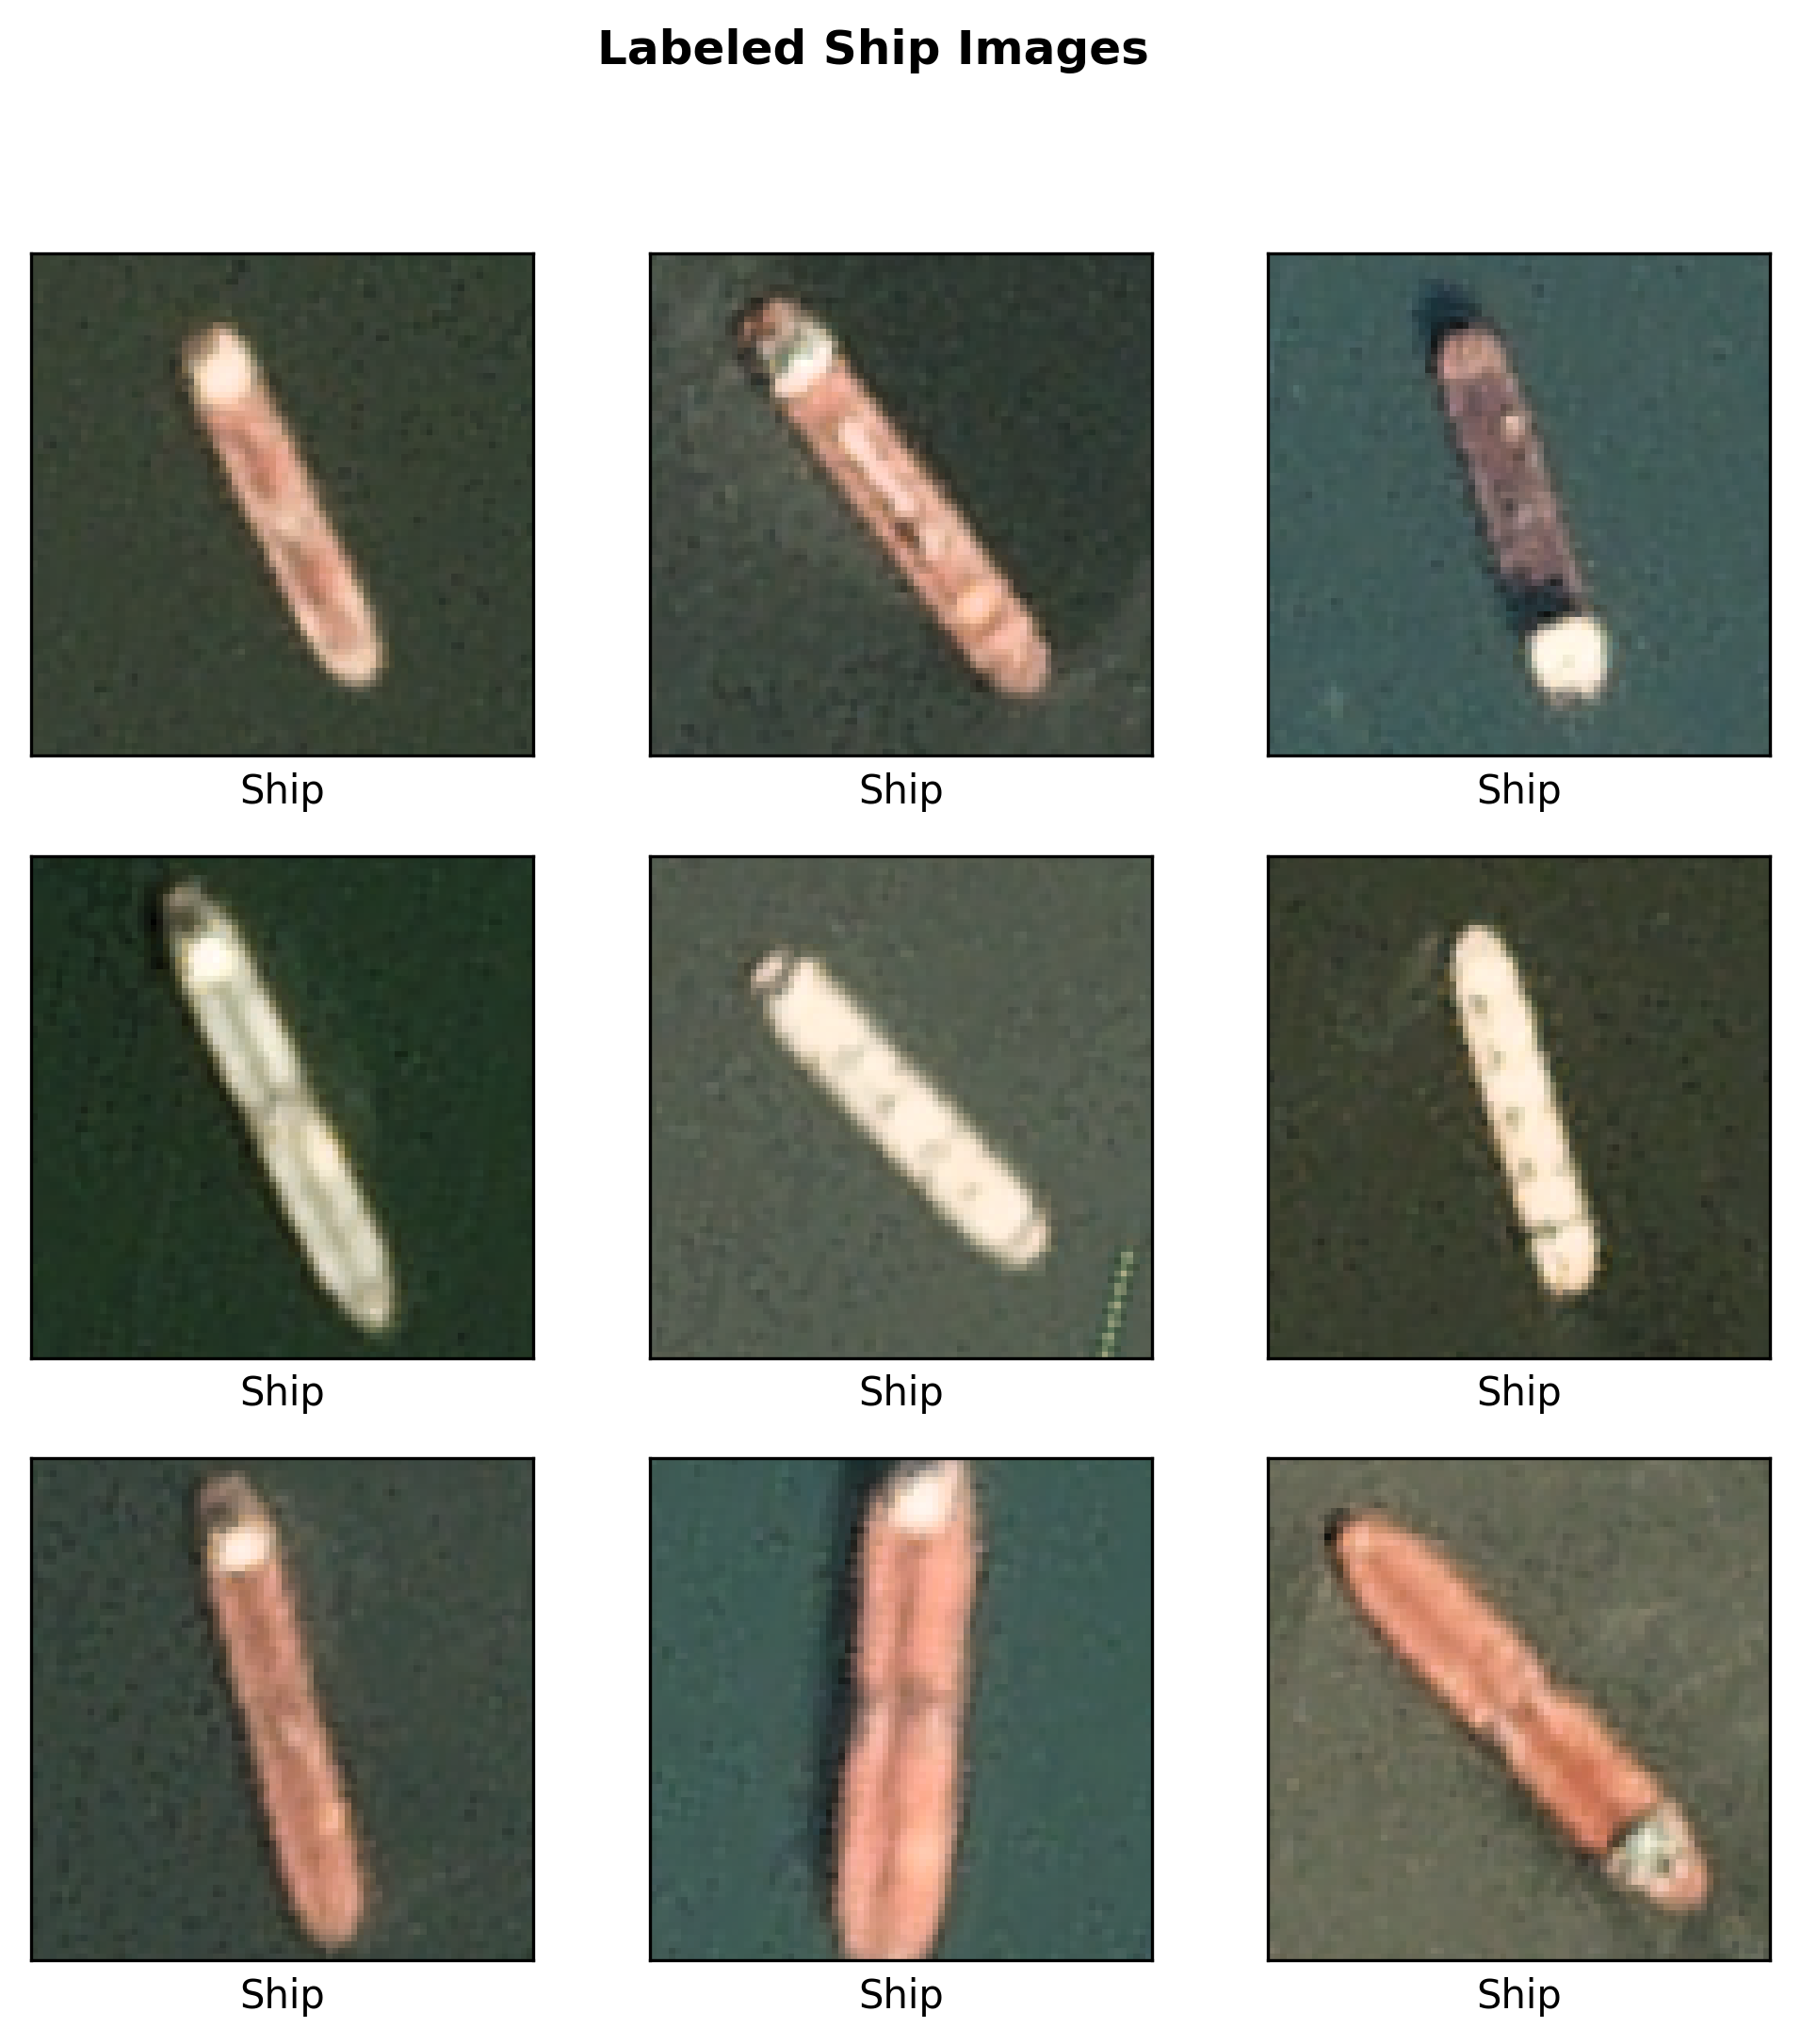

In [112]:
#Normalization
x = x_ship/255.0

#Mapping labels with output classes
classes = {0: 'No-Ship',
           1: 'Ship'}

#Visualizing Images with labels
plt.figure(figsize=(8,8), dpi = 300)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].reshape(80, 80, 3), cmap=plt.cm.binary)
    plt.xlabel(classes[y_ship[i]])
    print(i, classes[y_ship[i]])
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout()
#subplots_adjust(top=0.95)
plt.suptitle('Labeled Ship Images', fontweight='bold')
#format_axes()
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\ship-label-1.tif")
plt.show()

0 No-Ship
1 No-Ship
2 No-Ship
3 No-Ship
4 No-Ship
5 No-Ship
6 No-Ship
7 No-Ship
8 No-Ship


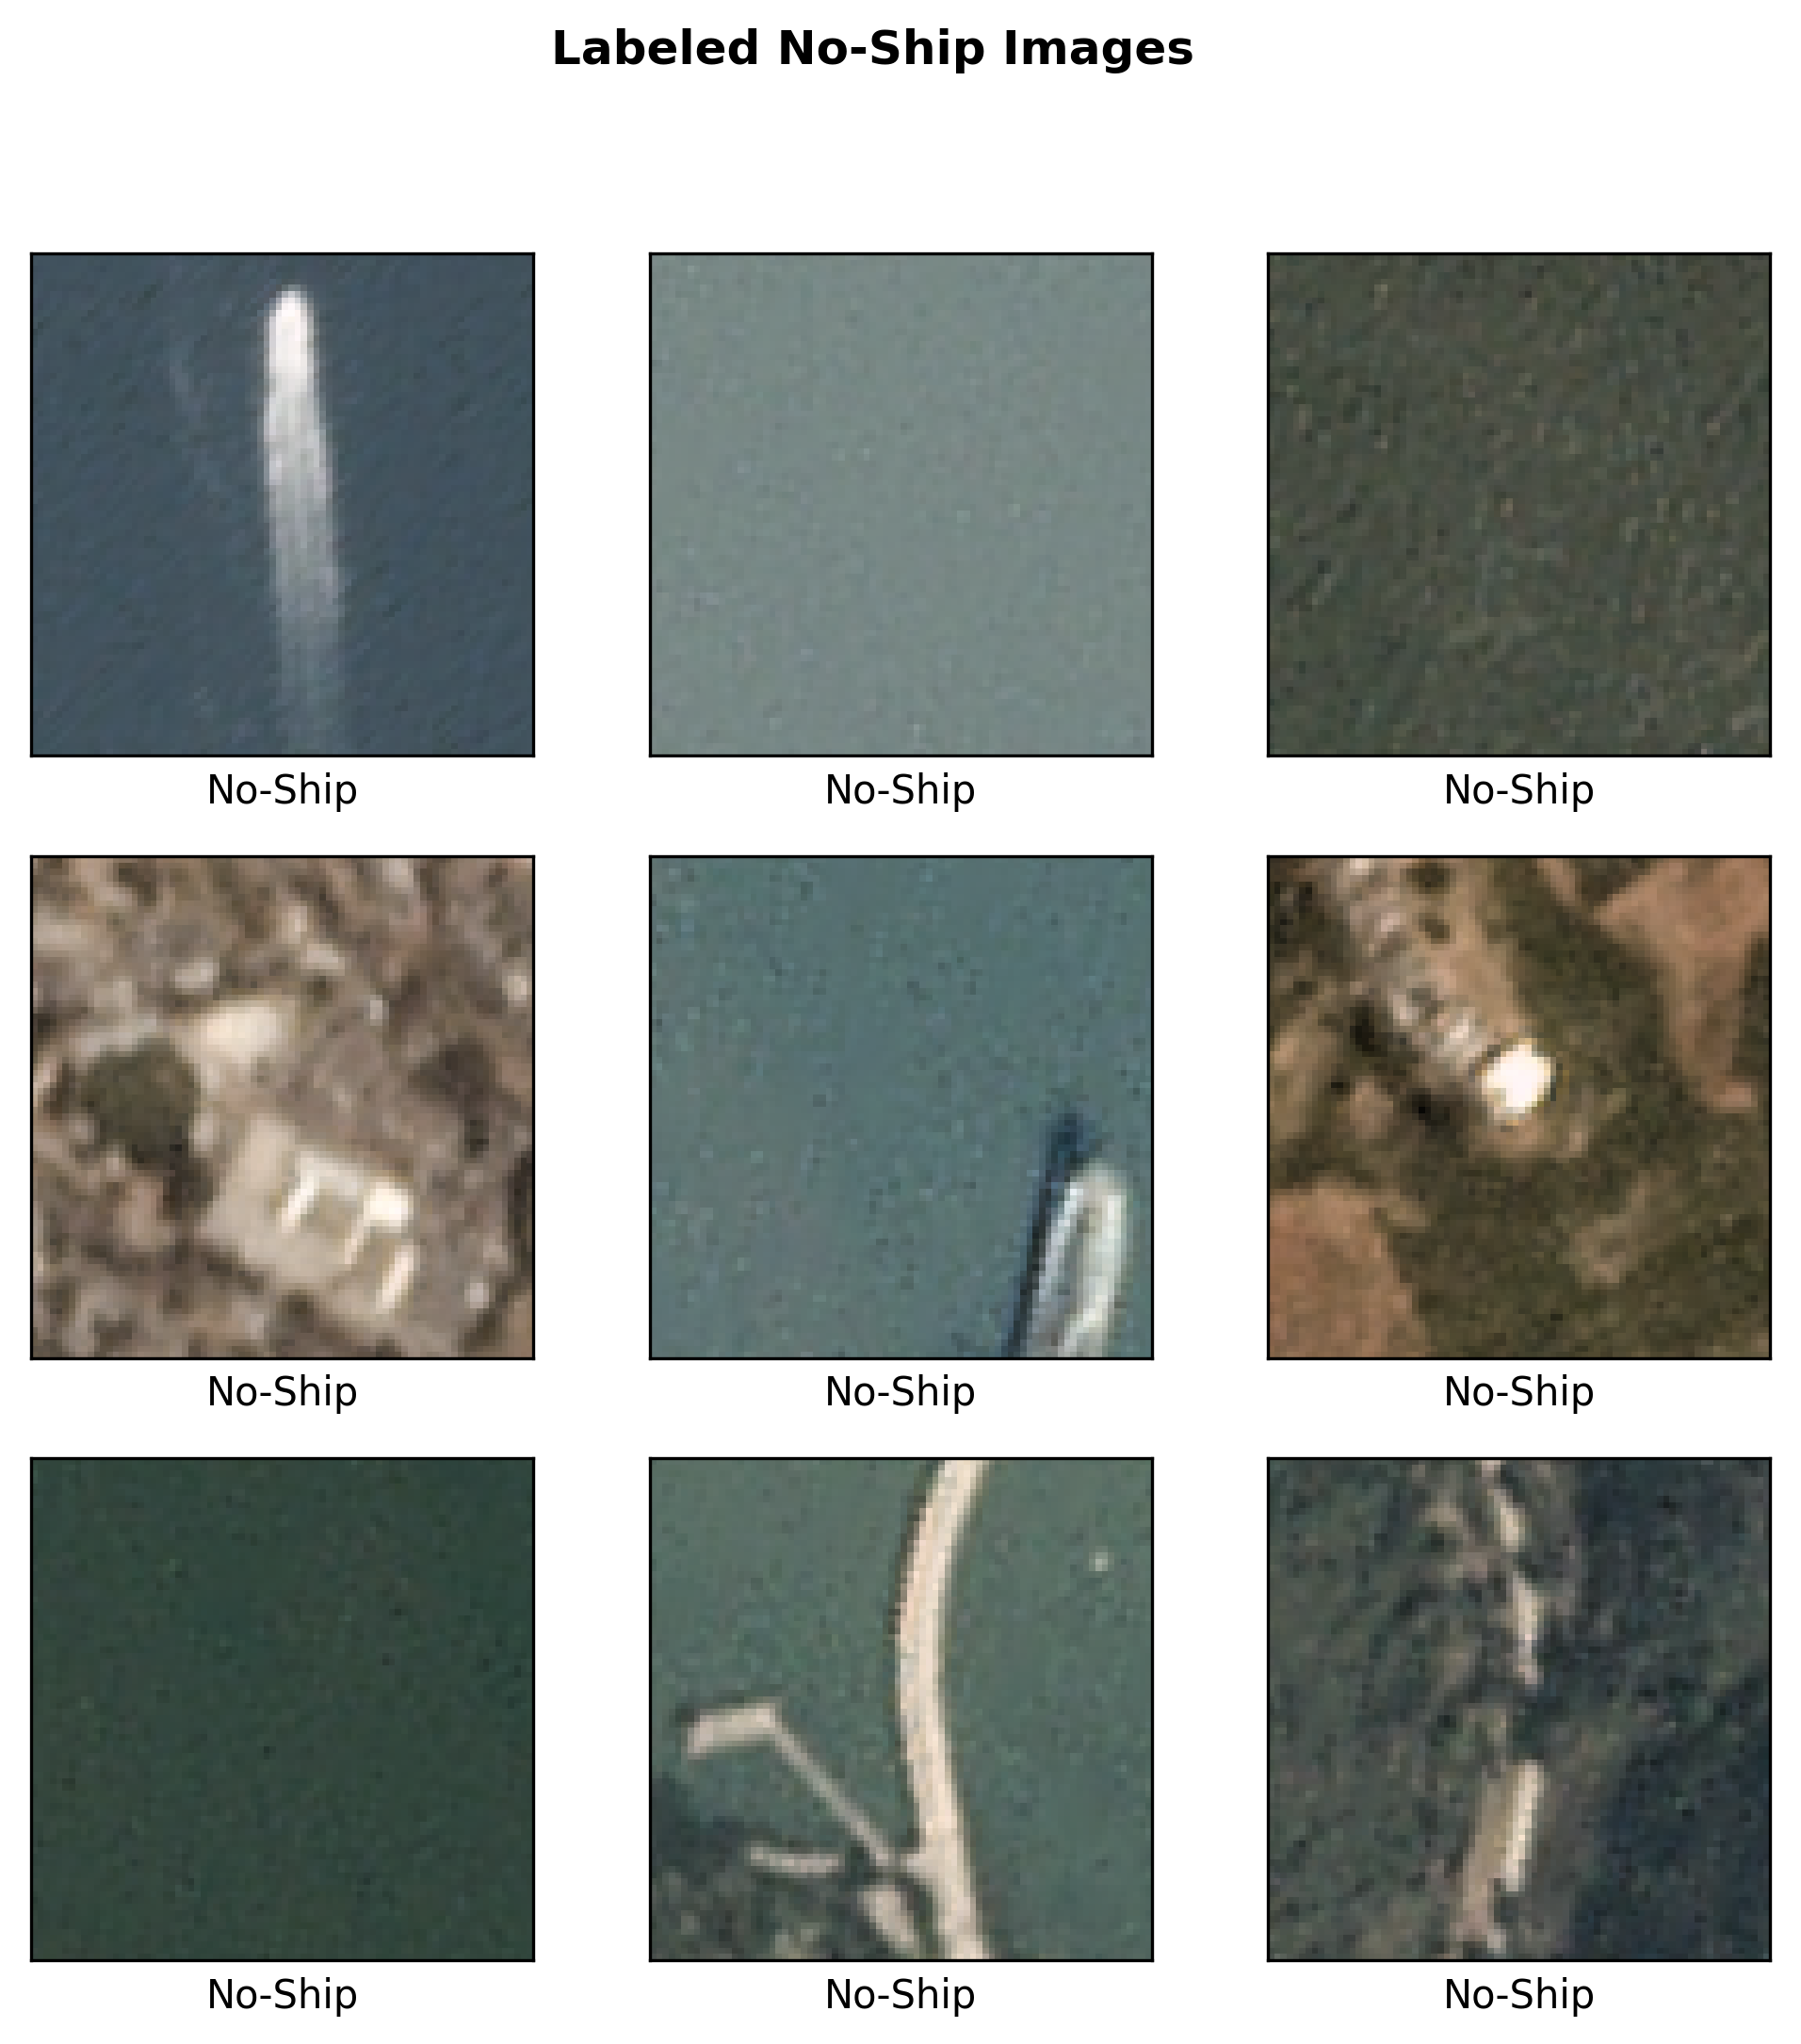

In [110]:
#Normalization
x = x_no_ship/255.0

#Mapping labels with output classes
classes = {0: 'No-Ship',
           1: 'Ship'}

#Visualizing Images with labels
plt.figure(figsize=(8,8), dpi = 300)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].reshape(80, 80, 3), cmap=plt.cm.binary)
    plt.xlabel(classes[y_no_ship[i]])
    print(i, classes[y_no_ship[i]])
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout()
#subplots_adjust(top=0.95)
plt.suptitle('Labeled No-Ship Images', fontweight='bold')
#format_axes()
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\noship-label-0'.tif")
plt.show()

0 Ship
1 Not a Ship
2 Not a Ship
3 Not a Ship
4 Not a Ship
5 Not a Ship


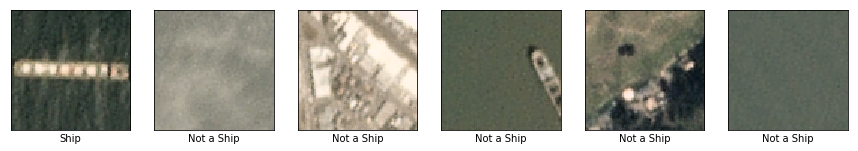

In [116]:
# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

#Shuffling Images and Labels by same shuffled index
x = x00[indexes]
y = y0[indexes]

#Normalization
x = x/255.0

#Mapping labels with output classes
classes = {0: 'Not a Ship',
           1: 'Ship'}

#Visualizing Images with labels
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].reshape(80, 80, 3), cmap=plt.cm.binary)
    plt.xlabel(classes[y[i]])
    print(i, classes[y[i]])
#plt.suptitle('Ship Images and Labels')
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\ship-label.tif")
plt.show()

In [117]:
#Spilting data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)

(3200, 80, 80, 3)


In [118]:
#Creating CNN model

def cnn_model(inputshape):
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape = inputshape , padding = 'same'),
        keras.layers.Conv2D(64,(5,5), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(128,(5,5), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = tf.nn.relu),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(2, activation = tf.nn.softmax)
    ])
    model.summary()
    return(model)
#Creating Checkpoint for saving weights
checkpoint_path = "training_ship/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)




training_ship = cnn_model((80,80,3))

#Calculating loss ,Accuracy & also optimizing it 
training_ship.compile(optimizer = tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

In [119]:
epochs = 30
batch_size = 256
vali_split = 0.33

# Training
import time
start_time = time.time()

trained_ship = training_ship.fit(x_train, y_train, validation_split = vali_split , epochs = epochs, callbacks = [cp_callback], batch_size = batch_size)

training_time = time.time() - start_time

Train on 2144 samples, validate on 1056 samples
Epoch 1/30
2048/2144 [===========================>..] - ETA: 6s - loss: 0.9015 - acc: 0.6523 
Epoch 00001: saving model to training_ship/cp.ckpt
2144/2144 [==============================] - 168s 78ms/sample - loss: 0.8843 - acc: 0.6609 - val_loss: 0.6210 - val_acc: 0.7320
Epoch 2/30
2048/2144 [===========================>..] - ETA: 6s - loss: 0.5530 - acc: 0.7427 
Epoch 00002: saving model to training_ship/cp.ckpt
2144/2144 [==============================] - 162s 76ms/sample - loss: 0.5497 - acc: 0.7458 - val_loss: 0.5475 - val_acc: 0.7585
Epoch 3/30
2048/2144 [===========================>..] - ETA: 6s - loss: 0.4515 - acc: 0.8164 
Epoch 00003: saving model to training_ship/cp.ckpt
2144/2144 [==============================] - 167s 78ms/sample - loss: 0.4500 - acc: 0.8172 - val_loss: 0.3493 - val_acc: 0.8561
Epoch 4/30
2048/2144 [===========================>..] - ETA: 6s - loss: 0.3161 - acc: 0.8760 
Epoch 00004: saving model to training_s

In [120]:
!ls {checkpoint_dir}
#model.load_weights(checkpoint_path)

checkpoint
cp.ckpt.data-00000-of-00002
cp.ckpt.data-00001-of-00002
cp.ckpt.index


In [121]:
#Evaluating model on testing set
training_ship.evaluate(x_test, y_test)

classifications = training_ship.predict(x_test)

800/800 [==============================] - 11s 14ms/sample - loss: 0.0597 - acc: 0.9812


In [122]:
print('Actual Output is {}.'.format(classes[y_test[2]]))

print('Predicted Output is {}.'.format(classes[np.argmax(classifications[2])]))

Actual Output is Not a Ship.
Predicted Output is Not a Ship.


Training 30 epochs in 83:21.1


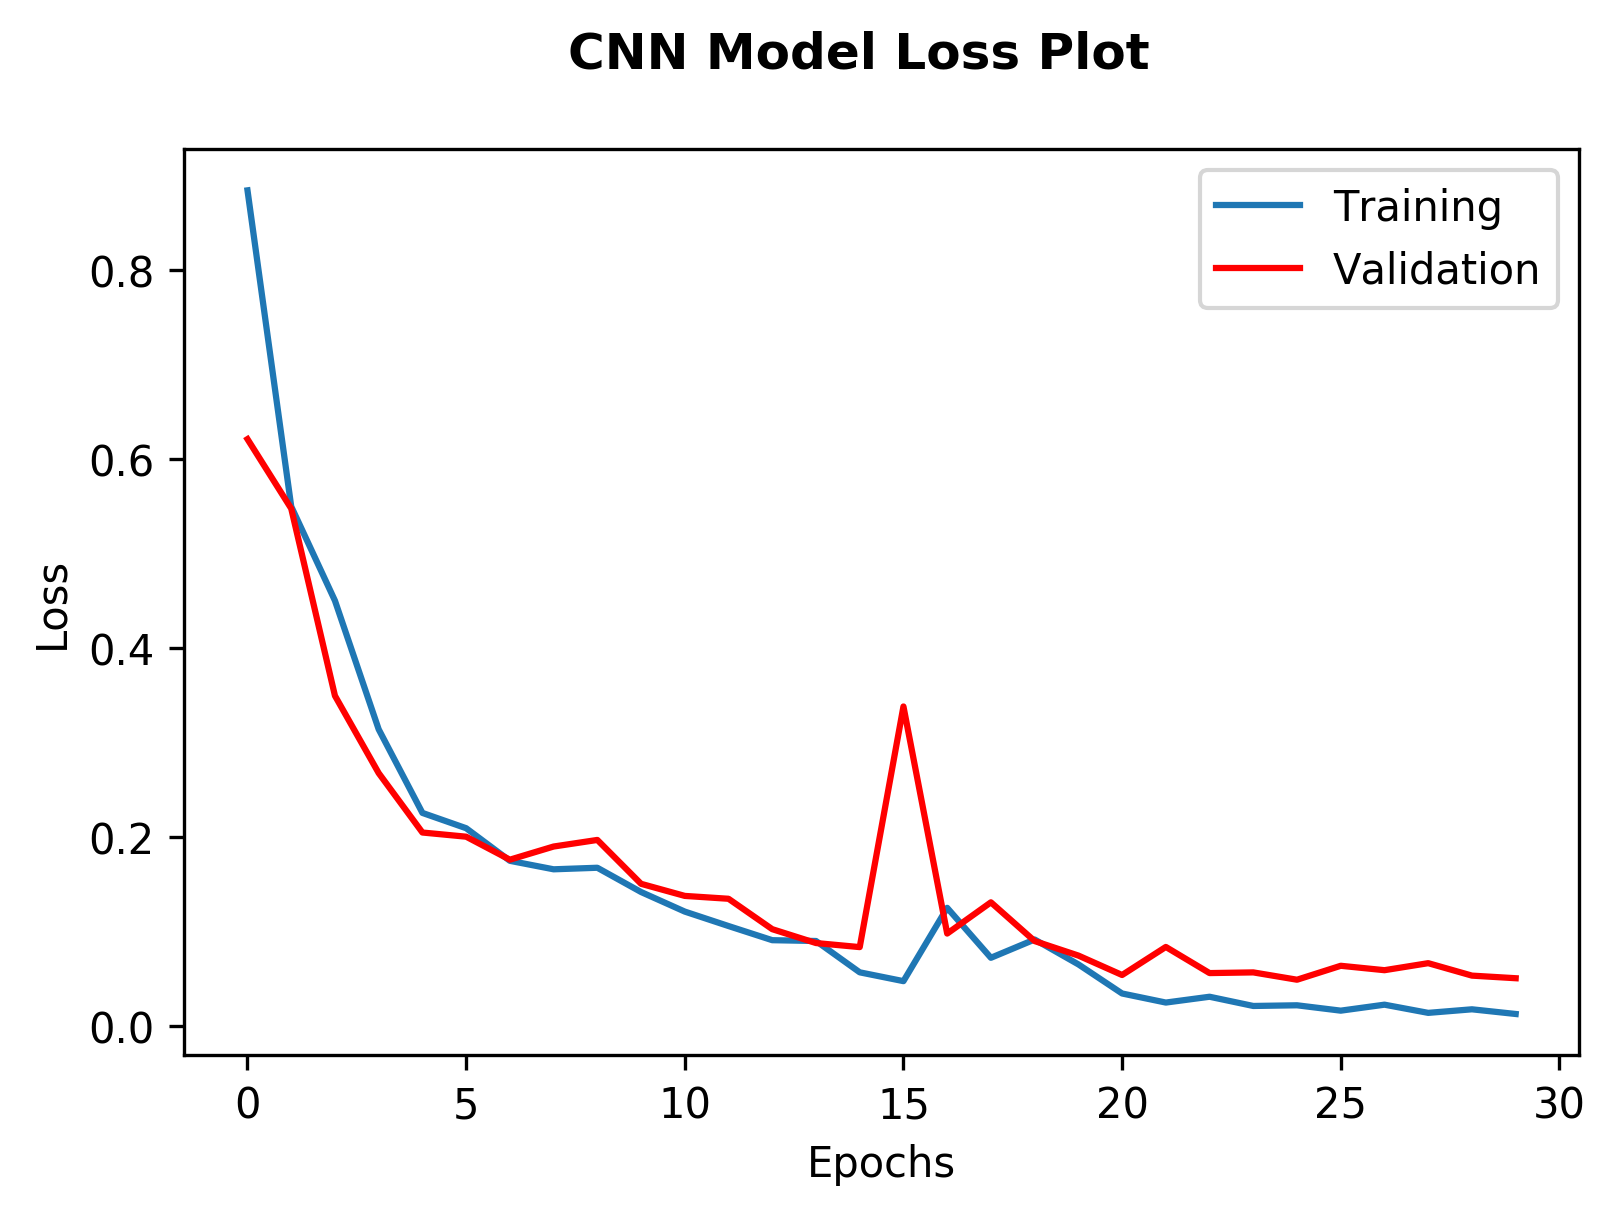

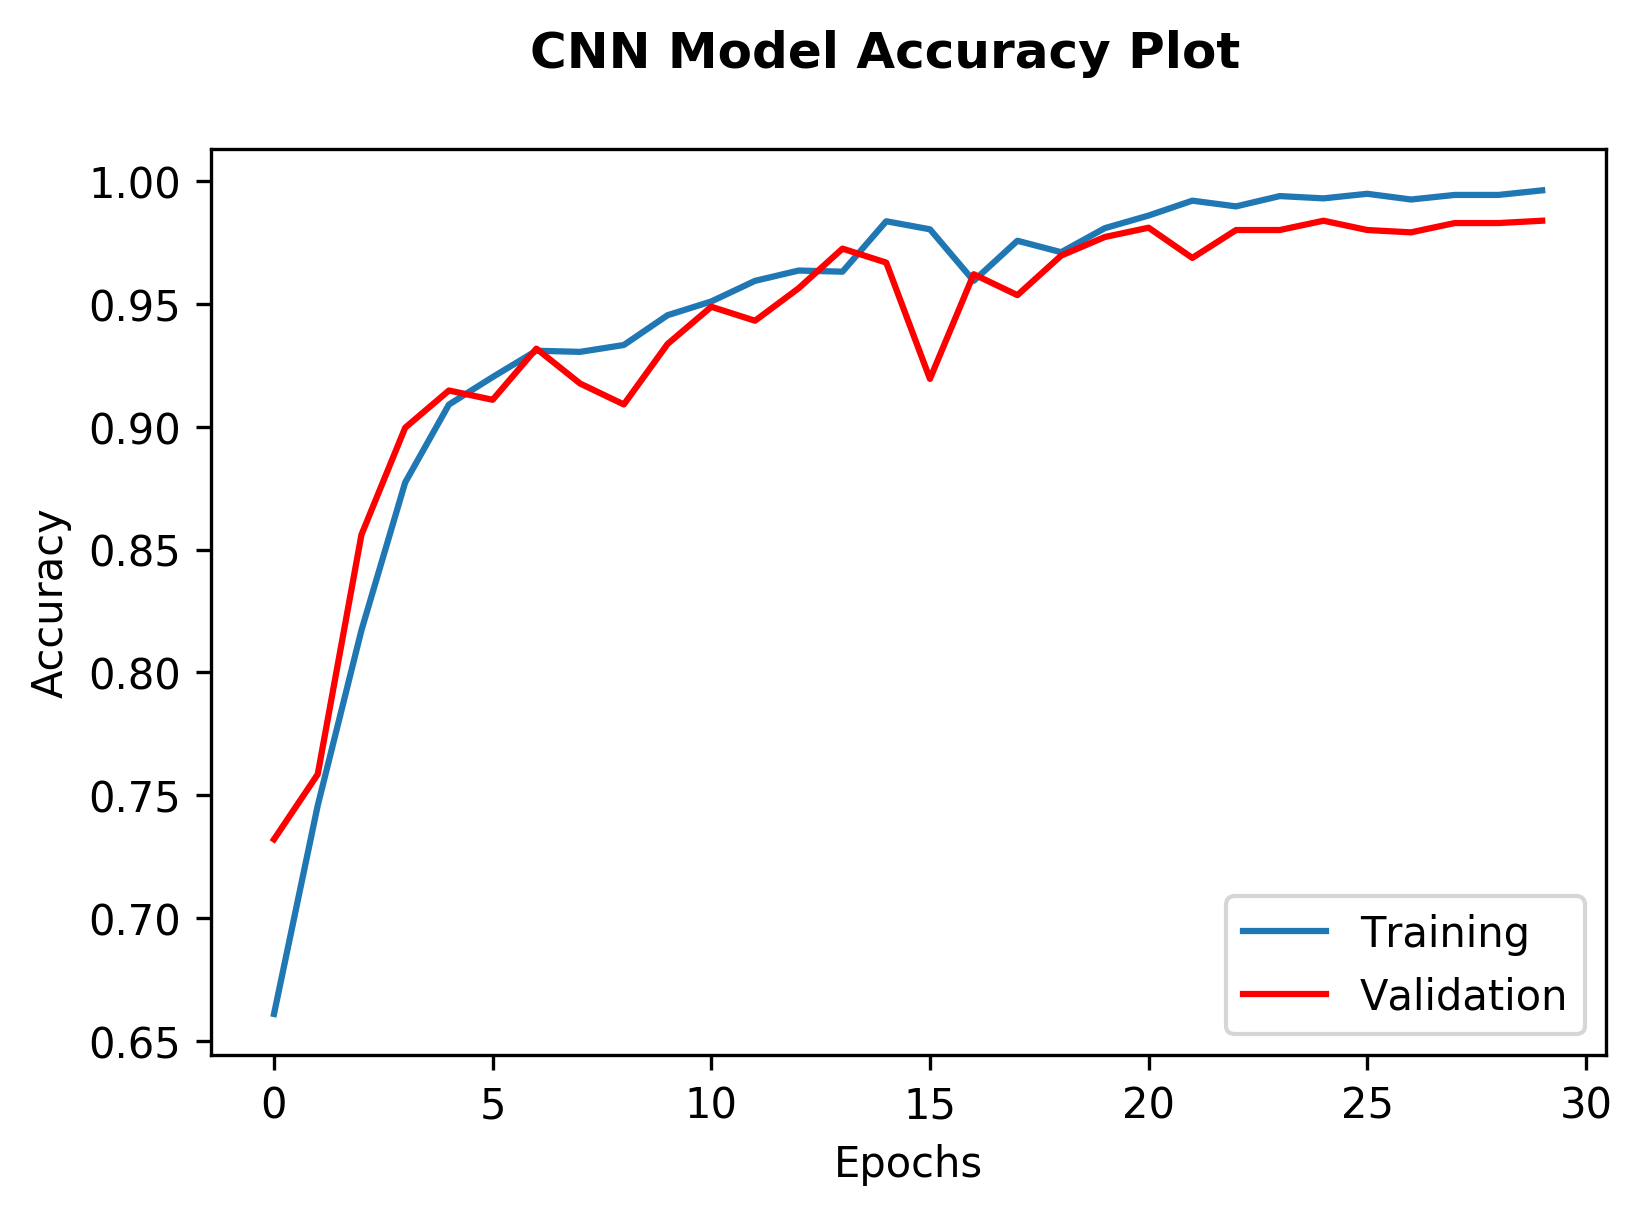

In [173]:
#Visualizing Loss and Accuracy

mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = trained_ship.history['loss']
val_loss = trained_ship.history['val_loss']
acc = trained_ship.history['acc']
val_acc = trained_ship.history['val_acc']

# loss plot
plt.figure(dpi = 300)
plt.plot(loss)
plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Loss')
plt.suptitle('CNN Model Loss Plot', fontweight='bold')
plt.legend(["Training", "Validation"])

#plt.savefig(r"F:\Jupyter Notebook\ship\figure\CNN-loss.tif")
plt.show()

# accuracy plot
plt.figure(dpi = 300)
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('Accuracy')
plt.suptitle('CNN Model Accuracy Plot', fontweight='bold')
plt.legend(['Training', 'Validation'], loc=4)

#plt.savefig(r"F:\Jupyter Notebook\ship\figure\CNN-accuracy.tif")
plt.show()

In [124]:
print(training_time)

5001.14667224884


In [125]:
#Checking out accuracy score of Model

from sklearn.metrics import accuracy_score
pred = training_ship.predict(x_test)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

print('Accuracy Score for Ships in Satellite Imagery is {}'.format(accuracy_score(y_test, pred_digits)*100))

Accuracy Score for Ships in Satellite Imagery is 98.125


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_digits))

In [126]:
import PIL

scene = PIL.Image.open(r'F:\Jupyter Notebook\ship\ships-in-satellite-imagery\scenes\scenes\sfbay_1.png')
tensor = np.array(scene).astype('uint8') / 255

In [127]:
# currently unused
import math

def euclidian_distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def manhattan_distance(a, b):
    return abs((a[0] - b[0]) + (a[1] - b[1]))    
width, height = scene.size
STEP_SIZE = 10

ships = {}

for row in range(0, height, STEP_SIZE):
    for col in range(0, width, STEP_SIZE):
        area = tensor[row:row+80, col:col+80, 0:3]
        
        if area.shape != (80, 80, 3):
            continue
            
        prediction = training_ship.predict(np.array([area]))
        score = prediction[0][1]
        
        if score > 0.5:
            print(f"found ship at [{row},{col}] with score {score}")
            ships[row, col] = score

found ship at [0,830] with score 0.9913206696510315
found ship at [10,810] with score 0.7122840881347656
found ship at [10,820] with score 0.9271321296691895
found ship at [40,1160] with score 0.9732143878936768
found ship at [50,1150] with score 0.7249060273170471
found ship at [50,2580] with score 0.6057777404785156
found ship at [60,2610] with score 0.7239594459533691
found ship at [280,1300] with score 0.5013746023178101
found ship at [410,1640] with score 0.9467830657958984
found ship at [420,1640] with score 0.9959444403648376
found ship at [420,1890] with score 0.8400046229362488
found ship at [430,1640] with score 0.9974195957183838
found ship at [430,1890] with score 0.9981212019920349
found ship at [440,1630] with score 0.8740765452384949
found ship at [440,1890] with score 0.9960028529167175
found ship at [450,1630] with score 0.9663066864013672
found ship at [460,1630] with score 0.9318682551383972
found ship at [470,840] with score 0.914482593536377
found ship at [470,2190

In [147]:
from matplotlib import pyplot as plt
from matplotlib import patches

fig = plt.figure(figsize=(16,32), dpi = 300)
ax = fig.add_subplot(3, 1, 1)

ax.imshow(tensor)

for ship in ships:
    row, col = ship
    ax.add_patch(patches.Rectangle((col, row), 80, 80, edgecolor='w', facecolor='none'))

plt.suptitle('Satellite Image Recognition on Bay area', fontsize=25, fontweight='bold')
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(r"F:\Jupyter Notebook\ship\figure\imageRecog-Bay-.tif")
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [166]:
import PIL

scene = PIL.Image.open(r'F:\Jupyter Notebook\ship\onthesea\onthesea\test6.jpg')
tensor = np.array(scene).astype('uint8') / 255

# currently unused
import math

def euclidian_distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def manhattan_distance(a, b):
    return abs((a[0] - b[0]) + (a[1] - b[1]))    
width, height = scene.size
STEP_SIZE = 10

ships = {}

for row in range(0, height, STEP_SIZE):
    for col in range(0, width, STEP_SIZE):
        area = tensor[row:row+80, col:col+80, 0:3]
        
        if area.shape != (80, 80, 3):
            continue
            
        prediction = training_ship.predict(np.array([area]))
        score = prediction[0][1]
        
        if score > 0.5:
            print(f"found ship at [{row},{col}] with score {score}")
            ships[row, col] = score

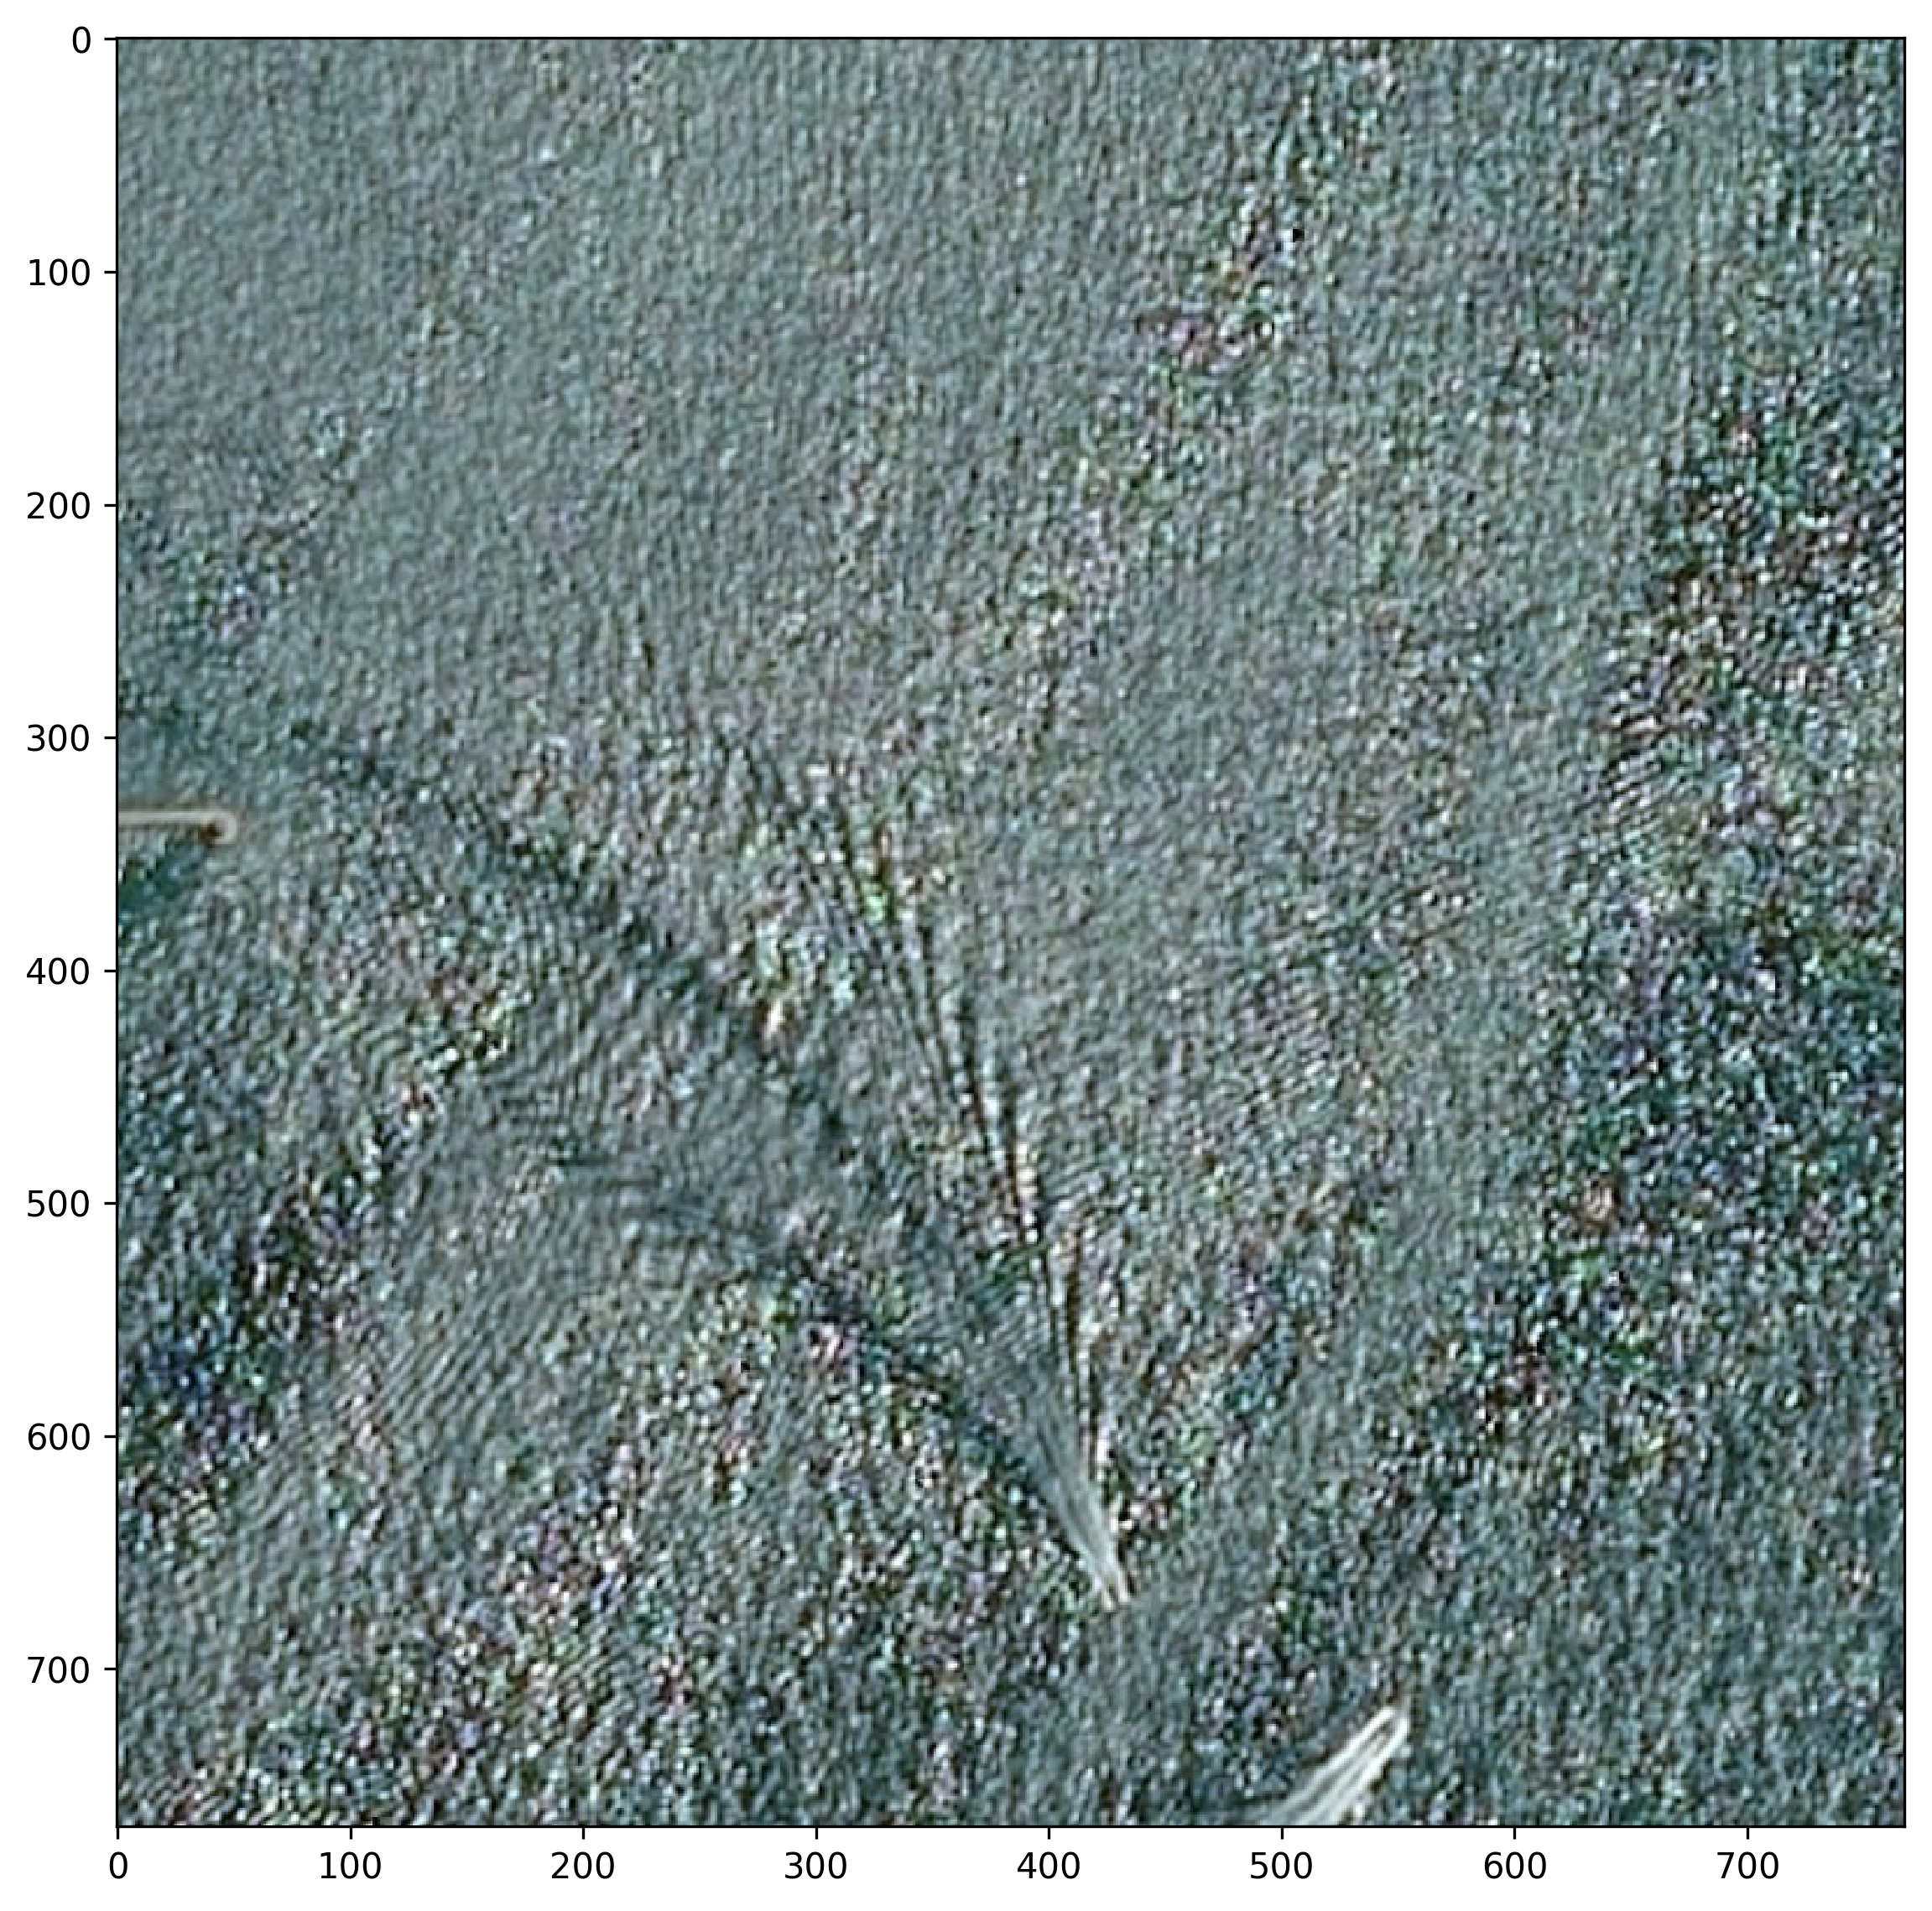

In [168]:
from matplotlib import pyplot as plt
from matplotlib import patches

fig = plt.figure(figsize=(16,32), dpi = 300)
ax = fig.add_subplot(3, 1, 1)

ax.imshow(tensor)

for ship in ships:
    row, col = ship
    ax.add_patch(patches.Rectangle((col, row), 80, 80, edgecolor='w', facecolor='none'))

#plt.suptitle('Satellite Image Recognition on Sea area - test 6', fontsize=20, fontweight='bold')
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\test6.tif")
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\test6-notitle.tif")
plt.show()

In [66]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
    plt.show()    

[[4.1911054e-02 9.5808893e-01]
 [2.9092453e-02 9.7090751e-01]
 [2.4777066e-04 9.9975222e-01]
 ...
 [9.9993670e-01 6.3309802e-05]
 [9.3529296e-01 6.4707011e-02]
 [1.0000000e+00 6.3438854e-09]]


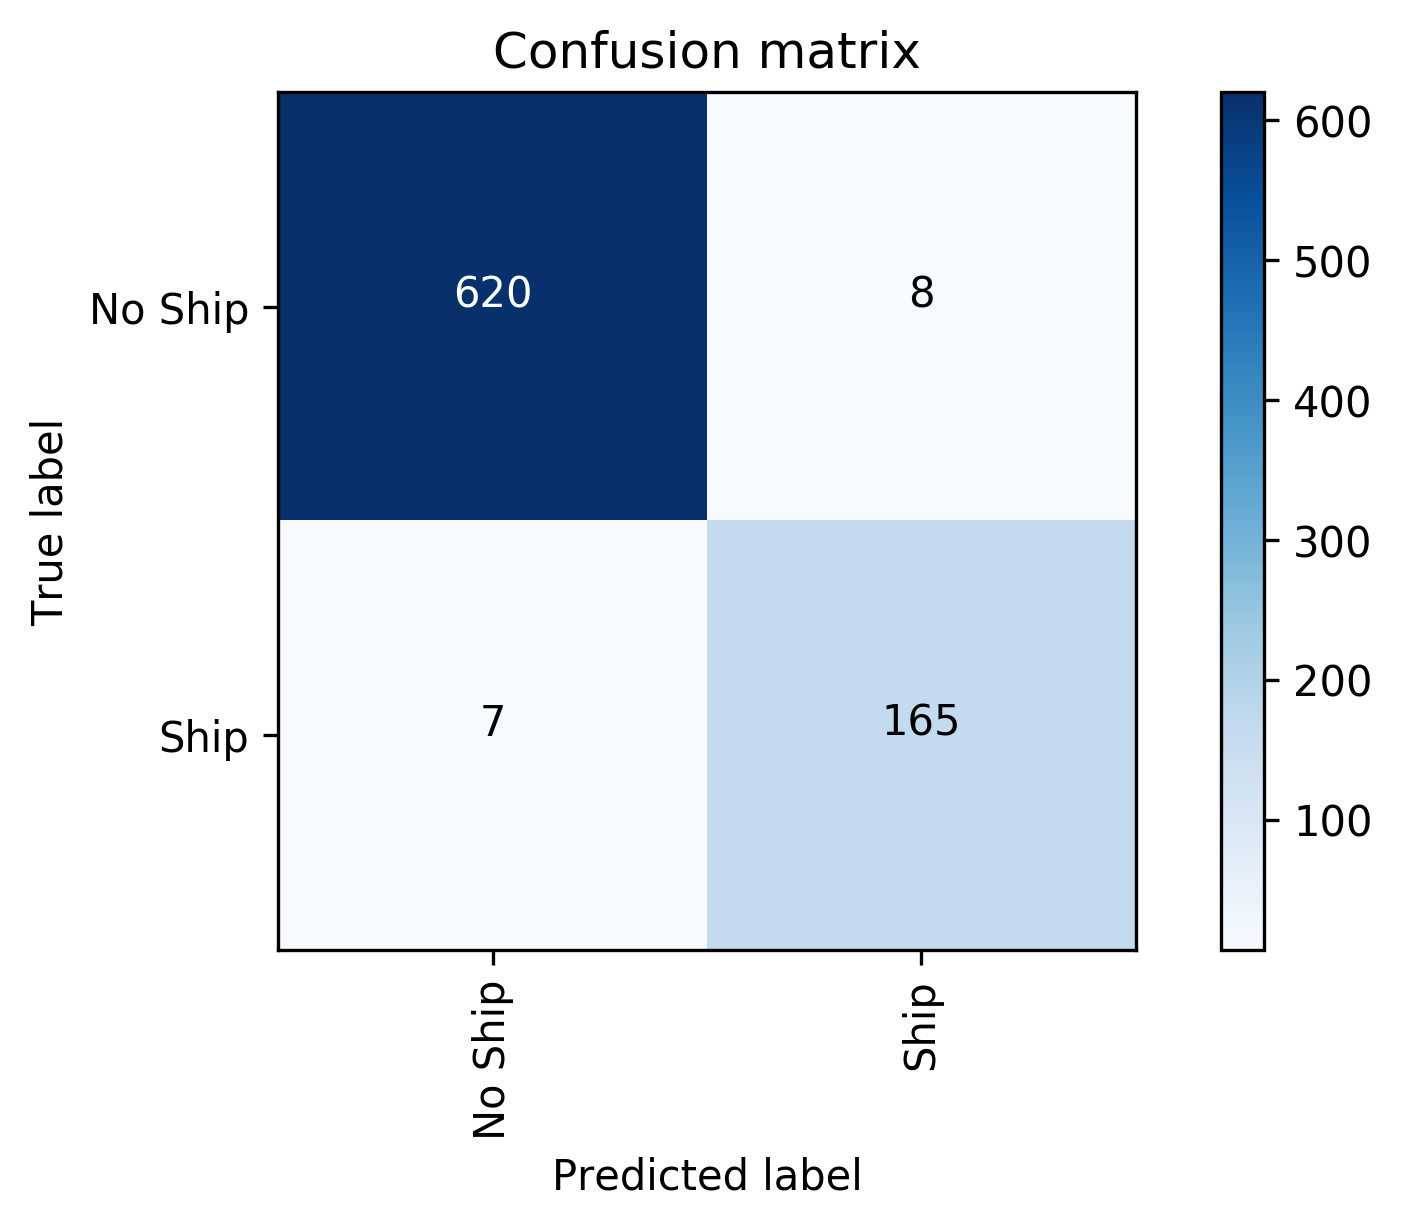

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools  


# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(figsize = (7,6), dpi=300)
    plt.figure(dpi=300)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'No Ship', 1: 'Ship'}
    
# Plot normalized confusion matrix
confusion_mtx = confusion_matrix(y_test, pred_digits)
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))

plt.savefig(r"F:\Jupyter Notebook\ship\figure\ConfusionMX-.tif")
plt.show()

# Lift Chart

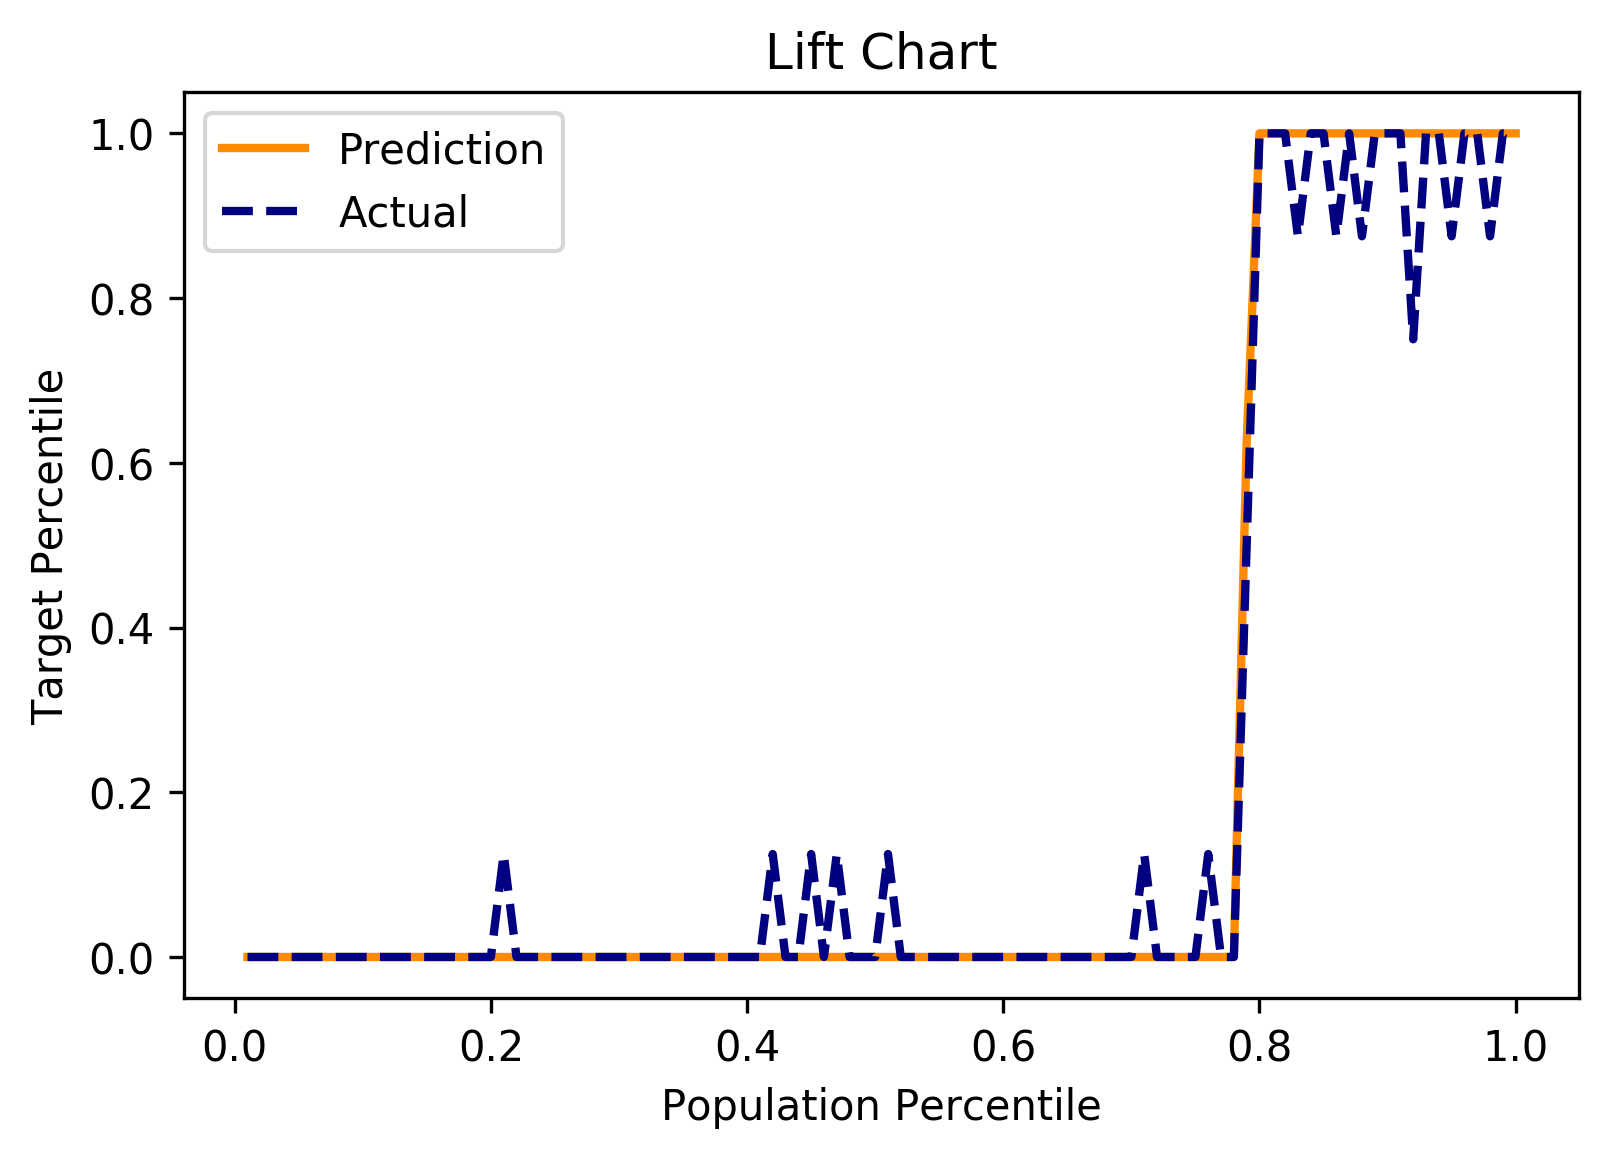

In [172]:
# Lift chart 

def plotLiftChart(actual, predicted):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.figure(dpi=300)
    plt.title('Lift Chart')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")
    
# Plot Lift Chart
plotLiftChart(y_test, pred_digits)
#plt.savefig(r"F:\Jupyter Notebook\ship\figure\LiftCh.tif")
plt.show()